In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('dataset for assignment 2.csv')
print(df.head())

   User ID  Gender  Age Activity Level  Location  App Sessions  \
0        1  Female   22         Active  Suburban           151   
1        2    Male   50         Active     Rural           157   
2        3    Male   36         Active     Urban           178   
3        4  Female   36         Active  Suburban           155   
4        5    Male   34      Sedentary     Rural            95   

   Distance Travelled (km)  Calories Burned  
0                      140              728  
1                      115              523  
2                      163              795  
3                       85              715  
4                       71              439  


In [3]:
descriptive_stats = df.describe()
print(descriptive_stats)


           User ID          Age  App Sessions  Distance Travelled (km)  \
count  5000.000000  5000.000000   5000.000000              5000.000000   
mean   2500.500000    38.423600    124.366400                92.550400   
std    1443.520003    12.160631     42.689317                36.746095   
min       1.000000    18.000000     50.000000                26.000000   
25%    1250.750000    28.000000     89.000000                63.000000   
50%    2500.500000    39.000000    124.000000                89.000000   
75%    3750.250000    49.000000    161.000000               118.000000   
max    5000.000000    59.000000    199.000000               195.000000   

       Calories Burned  
count      5000.000000  
mean        432.316000  
std         187.427426  
min         102.000000  
25%         285.000000  
50%         406.000000  
75%         560.000000  
max         987.000000  


In [4]:
# Define missing values
missing_values = df.isnull().sum()
data_types = df.dtypes
missing_values_df = pd.DataFrame({"Feature": df.columns, "Missing Values": missing_values, "Data Type": data_types})
print("### Missing Values and Data Types ###")
print(missing_values_df)

# Handling Missing Values
# Fill numeric columns with their mean
df.fillna(df.select_dtypes(include='number').mean(), inplace=True)

# Fill categorical columns with their mode (recommended approach)
df.update(df.select_dtypes(include='object').apply(lambda col: col.fillna(col.mode()[0])))

### Missing Values and Data Types ###
                                         Feature  Missing Values Data Type
User ID                                  User ID               0     int64
Gender                                    Gender               0    object
Age                                          Age               0     int64
Activity Level                    Activity Level               0    object
Location                                Location               0    object
App Sessions                        App Sessions               0     int64
Distance Travelled (km)  Distance Travelled (km)               0     int64
Calories Burned                  Calories Burned               0     int64


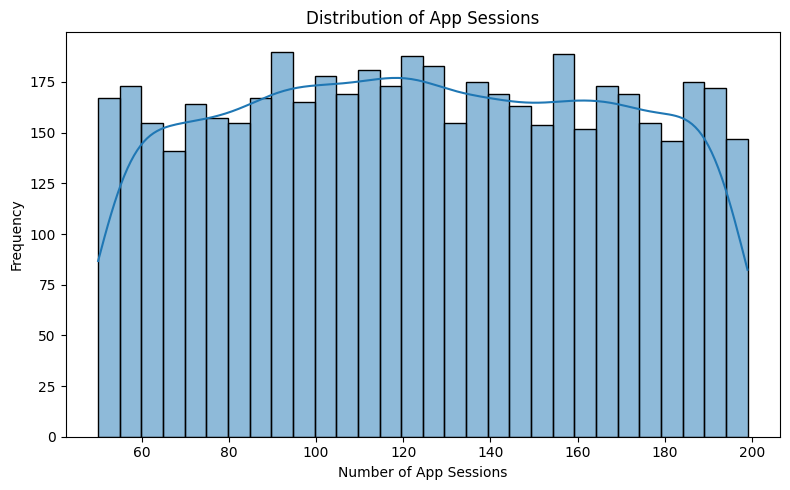

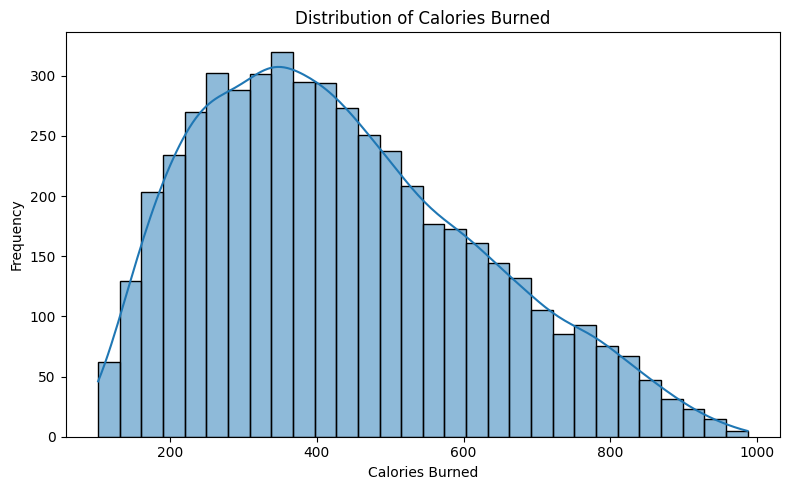

In [5]:
# Distribution of App Sessions
plt.figure(figsize=(8, 5))
sns.histplot(df['App Sessions'], bins=30, kde=True)
plt.title('Distribution of App Sessions')
plt.xlabel('Number of App Sessions')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Distribution of Calories Burned
plt.figure(figsize=(8, 5))
sns.histplot(df['Calories Burned'], bins=30, kde=True)
plt.title('Distribution of Calories Burned')
plt.xlabel('Calories Burned')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

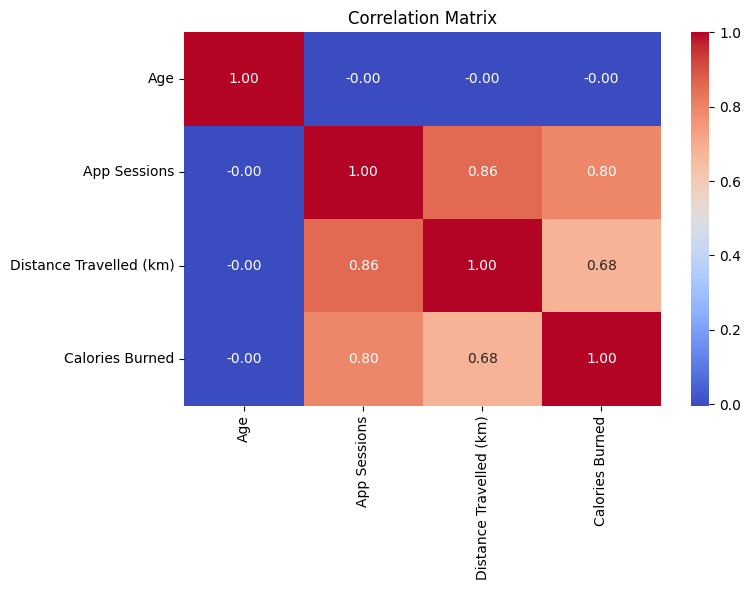

In [6]:
# Correlation Matrix for Numerical Features
plt.figure(figsize=(8, 6))
correlation = df[['Age', 'App Sessions', 'Distance Travelled (km)', 'Calories Burned']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

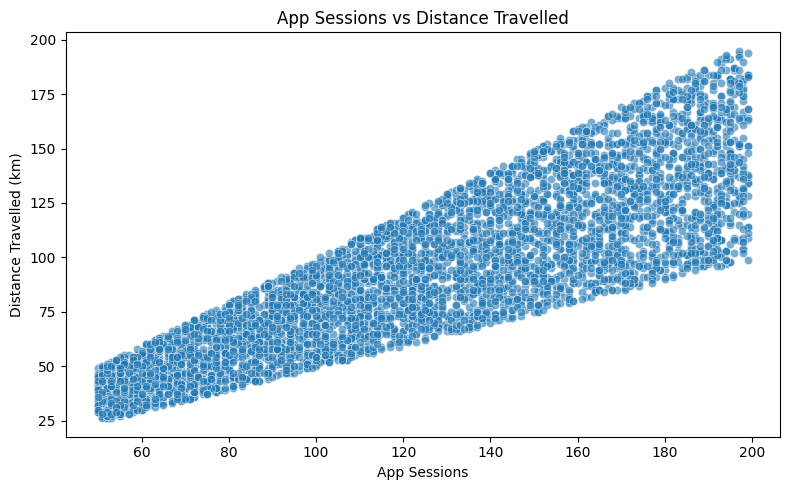

In [84]:
# App Session vs Distance Traveled
plt.figure(figsize=(8, 5))
sns.scatterplot(x='App Sessions', y='Distance Travelled (km)', data=df, alpha=0.6)
plt.title('App Sessions vs Distance Travelled')
plt.tight_layout()
plt.show()

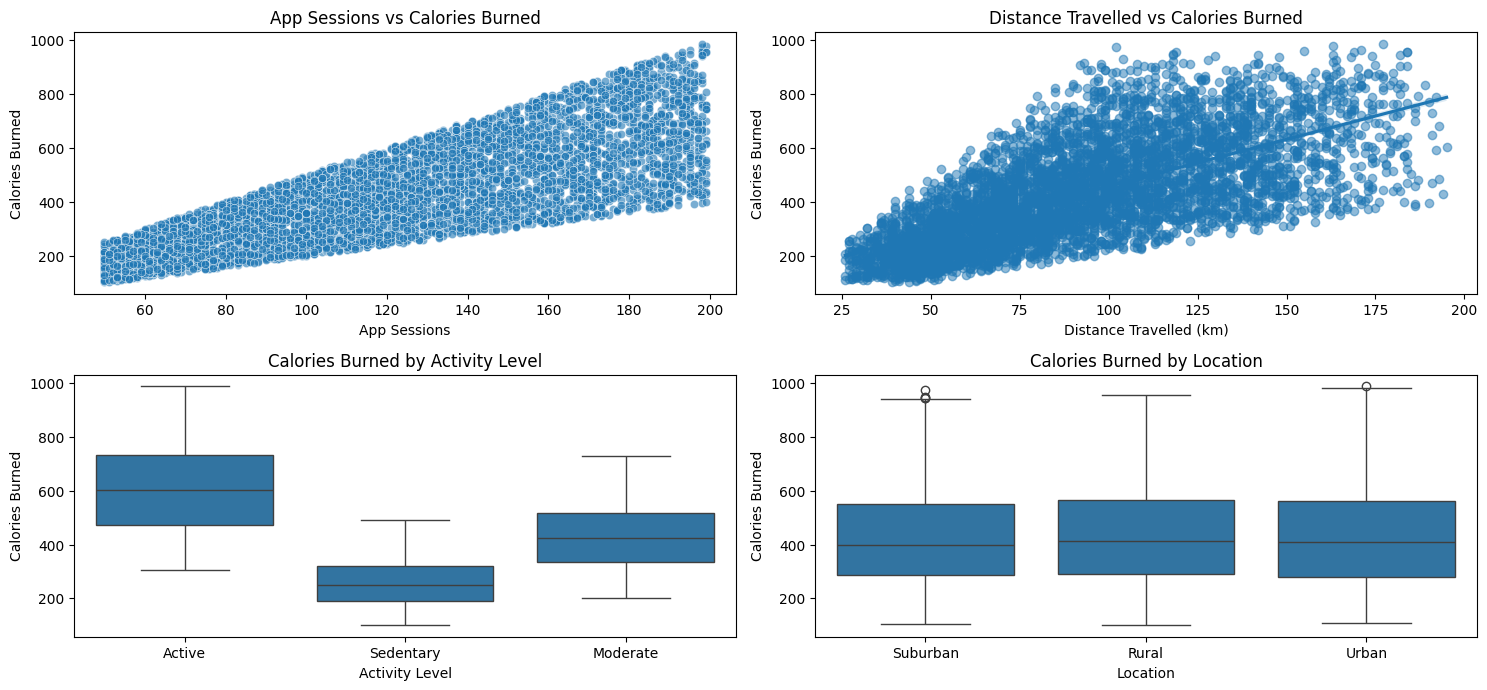

In [7]:
# Create a 3x2 grid of plots
plt.figure(figsize=(15, 10))

# App Sessions vs Calories Burned
# Show the correlation between the number of app sessions and calorie burn.
plt.subplot(3, 2, 1)
sns.scatterplot(x='App Sessions', y='Calories Burned', data=df, alpha=0.6)
plt.title('App Sessions vs Calories Burned')

# Distance Travelled vs Calories Burned
# Highlight the positive relationship between distance travelled and calorie burn.
plt.subplot(3, 2, 2)
sns.regplot(x='Distance Travelled (km)', y='Calories Burned', data=df, scatter_kws={'alpha': 0.5})
plt.title('Distance Travelled vs Calories Burned')

# Activity Level vs Calories Burned (Box Plot)
# Show the distribution of calorie burn across different activity levels.
plt.subplot(3, 2, 3)
sns.boxplot(x='Activity Level', y='Calories Burned', data=df)
plt.title('Calories Burned by Activity Level')

# Location vs Calories Burned (Box Plot)
# Show how engagement levels vary by location (Urban, Suburban, Rural).
plt.subplot(3, 2, 4)
sns.boxplot(x='Location', y='Calories Burned', data=df)
plt.title('Calories Burned by Location')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [3]:
df_encoded = df.copy()

# Feature Engineering - Converting Categorical Variables to Numeric
df_encoded['Gender'] = df_encoded['Gender'].map({'Female': 0, 'Male': 1})
df_encoded['Activity Level'] = df_encoded['Activity Level'].map({'Sedentary': 2, 'Moderate': 1, 'Active': 0})
df_encoded['Location'] = df_encoded['Location'].map({'Urban': 2, 'Suburban': 1, 'Rural': 0})

# Displaying encoded DataFrame
print(df_encoded.head())

   User ID  Gender  Age  Activity Level  Location  App Sessions  \
0        1       0   22               0         1           151   
1        2       1   50               0         0           157   
2        3       1   36               0         2           178   
3        4       0   36               0         1           155   
4        5       1   34               2         0            95   

   Distance Travelled (km)  Calories Burned  
0                      140              728  
1                      115              523  
2                      163              795  
3                       85              715  
4                       71              439  


In [6]:
# Regression Analysis: Predict Calories Burned
#X = df_encoded[['Age', 'Gender', 'Activity Level', 'Location', 'Calories Burned', 'Distance Travelled (km)']]
X = df_encoded[['Age', 'Gender', 'Location', 'Calories Burned', 'Distance Travelled (km)']]
y = df_encoded['App Sessions']

# Split data for regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Linear Regression Model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)
y_pred_lr = reg_model.predict(X_test)

# Decision Tree Regression Model
# Hyperparameter tuning for Decision Tree Regressor
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Best model
best_tree_regressor = grid_search.best_estimator_

# Predictions with best Decision Tree model
y_pred_tree = best_tree_regressor.predict(X_test)


# Random Forest Regression Model
rf_model = RandomForestRegressor(n_estimators=100, max_depth=7, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluation Metrics
mse_lr = mean_squared_error(y_test, y_pred_lr)
mse_tree = mean_squared_error(y_test, y_pred_tree)
mse_rf = mean_squared_error(y_test, y_pred_rf)

r2_lr = r2_score(y_test, y_pred_lr)
r2_tree = r2_score(y_test, y_pred_tree)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Mean Squared Error (Linear Regression): {mse_lr:.2f}')
print(f'Mean Squared Error (Decision Tree Regression): {mse_tree:.2f}')
print(f'Mean Squared Error (Random Forest Regression): {mse_rf:.2f}')

print(f'R² Score (Linear Regression): {r2_lr:.2f}')
print(f'R² Score (Decision Tree Regression): {r2_tree:.2f}')
print(f'R² Score (Random Forest Regression): {r2_rf:.2f}')


Mean Squared Error (Linear Regression): 332.48
Mean Squared Error (Decision Tree Regression): 337.92
Mean Squared Error (Random Forest Regression): 283.94
R² Score (Linear Regression): 0.82
R² Score (Decision Tree Regression): 0.82
R² Score (Random Forest Regression): 0.85


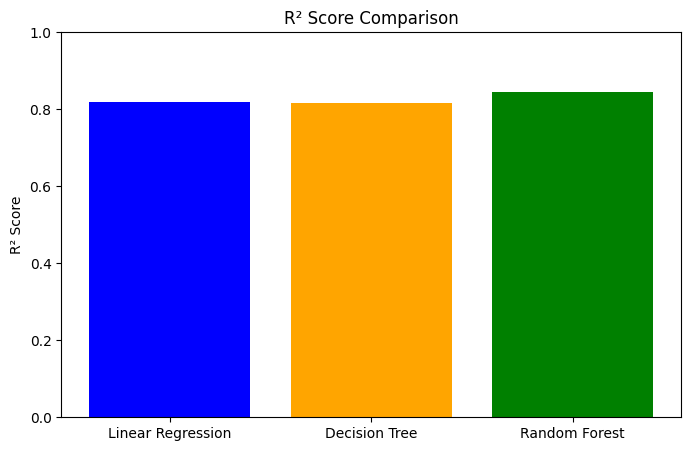

In [5]:
# Visualization: R² Score Comparison
plt.figure(figsize=(8, 5))
models = ['Linear Regression', 'Decision Tree', 'Random Forest']
r2_scores = [r2_lr, r2_tree, r2_rf]
plt.bar(models, r2_scores, color=['blue', 'orange', 'green'])
plt.title('R² Score Comparison')
plt.ylabel('R² Score')
plt.ylim(0, 1)
plt.show()

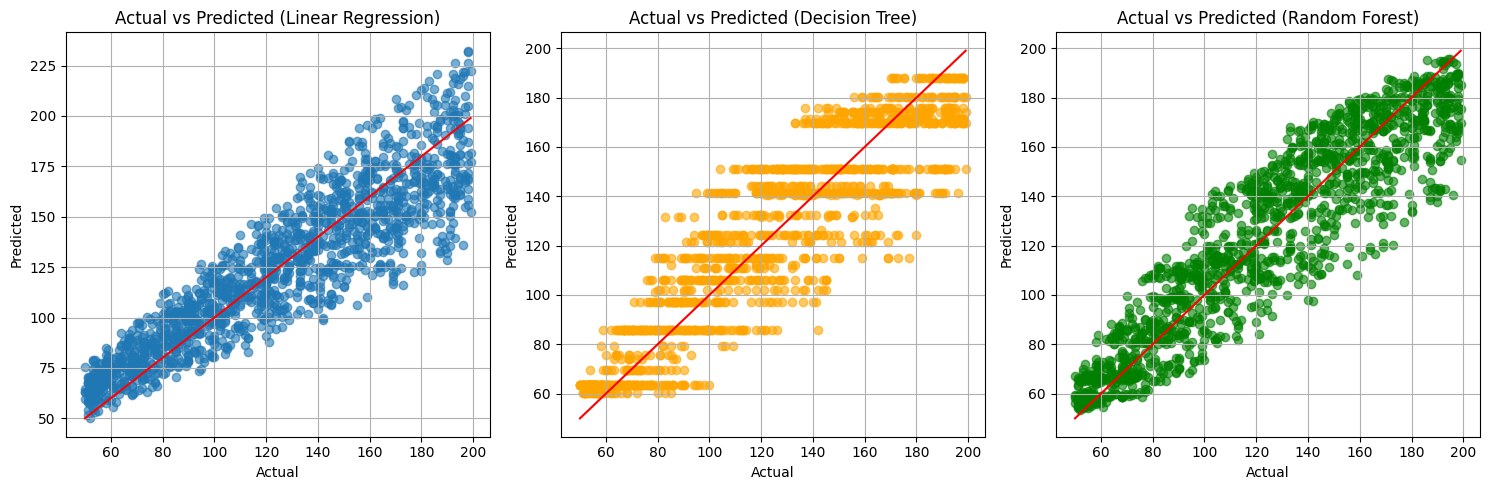

In [68]:
# Visualizing Regression Predictions
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_lr, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.title('Actual vs Predicted (Linear Regression)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_tree, alpha=0.6, color='orange')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.title('Actual vs Predicted (Decision Tree)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_rf, alpha=0.6, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.title('Actual vs Predicted (Random Forest)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(True)

plt.tight_layout()
plt.show()

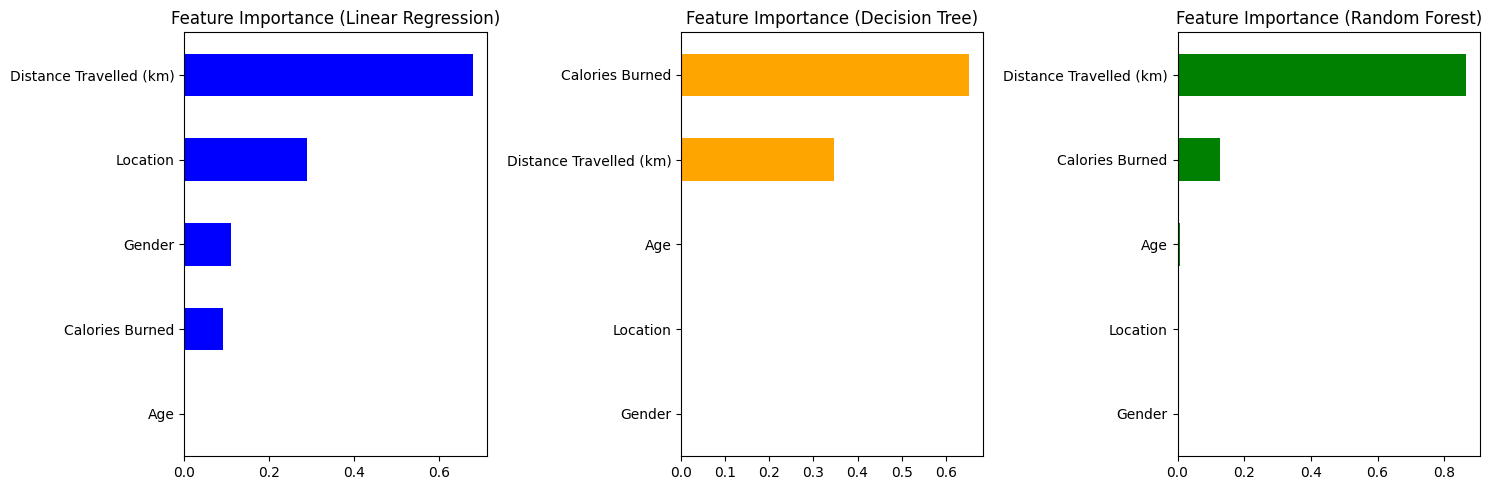

In [81]:
# Feature Importance Visualization for All Models
plt.figure(figsize=(15, 5))

# Linear Regression Feature Importance
plt.subplot(1, 3, 1)
importances_lr = pd.Series(np.abs(reg_model.coef_), index=X.columns)  # Linear Regression Feature Importance
importances_lr.sort_values().plot(kind='barh', color='blue')
plt.title('Feature Importance (Linear Regression)')

# Decision Tree Feature Importance
plt.subplot(1, 3, 2)
importances_tree = pd.Series(best_tree_regressor.feature_importances_, index=X.columns)  # Decision Tree Feature Importance
importances_tree.sort_values().plot(kind='barh', color='orange')
plt.title('Feature Importance (Decision Tree)')

# Random Forest Feature Importance
plt.subplot(1, 3, 3)
importances_rf = pd.Series(rf_model.feature_importances_, index=X.columns)  # Random Forest Feature Importance
importances_rf.sort_values().plot(kind='barh', color='green')
plt.title('Feature Importance (Random Forest)')

plt.tight_layout()
plt.show()

Silhouette Score (Clustering Performance): 0.40


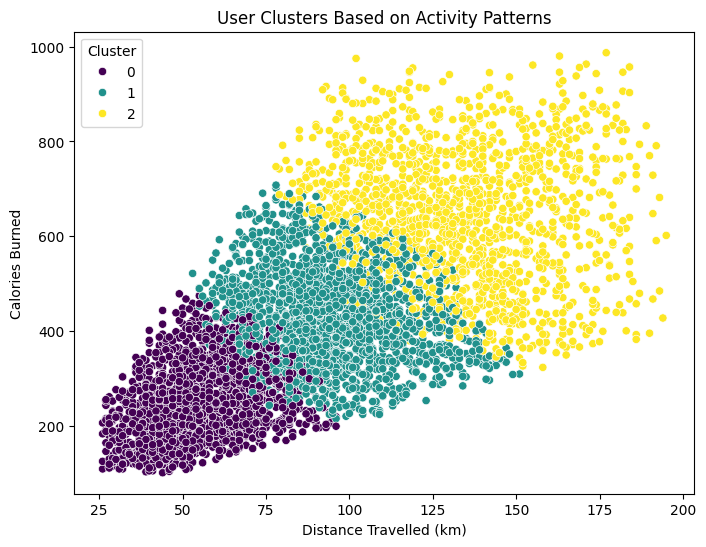

In [80]:
# Clustering Analysis: Group users based on app engagement
cluster_features = df[['App Sessions', 'Distance Travelled (km)', 'Calories Burned']]

# Standardizing features for KMeans
scaler = StandardScaler()
cluster_features_scaled = scaler.fit_transform(cluster_features)

kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(cluster_features_scaled)

# Silhouette Score for clustering evaluation
silhouette_avg = silhouette_score(cluster_features_scaled, df['Cluster'])
print(f'Silhouette Score (Clustering Performance): {silhouette_avg:.2f}')
# Visualization: Clustering Results
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Distance Travelled (km)', y='Calories Burned', hue='Cluster', data=df, palette='viridis')
plt.title('User Clusters Based on Activity Patterns')
plt.xlabel('Distance Travelled (km)')
plt.ylabel('Calories Burned')
plt.legend(title='Cluster')
plt.show()